# Data distributions

A data distribution refers to the way in which data values are spread or distributed across a dataset. It provides information about the possible values a variable can take on and how frequently each value occurs. By understanding the distribution of data, it forms the basis for:

- **Making inferences**
- **Building models**
- **Drawing conclusions about the population based on a sample**

It also,

- Informs decision-making
- Helps in selecting the appropriate statistical tests or algorithms for data modelling in ML and DL
- Provides insights into the underlying paterns and characteristcs of the dataset
- Helps us perform better outlier and missing value treatment

## Characteristics of a data distribution

1. Cardinality: nunique and unique (for discrete columns)
2. Count, Min, Max (for numerical columns)
3. Central Tendency to indicate the center of the data
4. Dispersion or spread to describe how spread out the data points are
5. Shape: refers to the overall pattern or form of the distribution, e.g normal(bell-shaped), skewed(lopsided) and uniform(evenly distributed)

## Types of distributions
The two broad categories of data disributions include:

`1. Discrete (categorical or discrete numerical columns)`

    - Bernoulli distribution
    - Binomial distribution
    - Poisson distribution
    - Multinomial distribution

`2. Continuous (continuous/real numerical features)`

    - Uniform distribution
    - Gaussian (normal) distribution
    - Exponential distribution
    - Log Normal distribution
    - Pareto (power law) distribution

`Probability Mass Function (PMF)` - discrete --> give probabilities associated with specific points

`Probability Density Function (PDF)` - continuous --> describes probabilities over intervals

## Importing libraries and creating helper functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Creating helper functions for non-visual analysis

In [2]:
def discrete_non_viz_analysis(data):
    series = pd.Series(data)
    print(series.agg(['count', 'unique', 'nunique']))
    print('Value counts: \n', series.value_counts(), '\n')
    
    
def contin_non_viz_analysis(data):
    series = pd.Series(data)
    print(series.agg(['count', 'min', 'max', 'mean', 'median', 'var', 'std', 'skew', 'kurt']).round(2), '\n')


### Creating helper functions for visual analysis

In [3]:
def discrete_viz_analysis(data):
    fig, ax = plt.subplots(figsize=(5,3), constrained_layout=True)
    fig.suptitle('Discrete Distribution plot')
    
    ax.set_title('Count plot')
    sns.countplot(x=data, ax=ax)
    
    plt.xticks(rotation=45)
    plt.show()
    
def contin_viz_analysis(data):
    fig, axs = plt.subplots(1,3, figsize=(8,3), constrained_layout=True)
    fig.suptitle('Continuous Distribution plot')
    
    axs[0].set_title('Histogram plot')
    sns.histplot(data, ax=axs[0])
    
    axs[1].set_title('KDE plot')
    sns.kdeplot(data, fill = True, ax=axs[1])
    
    axs[2].set_title('Box plot')
    sns.boxplot(data, ax=axs[2])
    
    plt.show()

## Shape of data distribution

**Skewness** and **kurtosis** are two **statistical measures** that describe the shape and distribution of the dataset.

1. `Skewness:`
this measures the asymmetry of the probability distribution of a random variable about its mean. It tells us whether the data is skewed to the left or right relative to the mean.

    - **Negative skewness**: here, the tail of the distribution extends more to the left of the mean OR the skew value is negative

    - **Positive skewness**: the tail extends more to the right of the mean OR the skew value is positive

    - **Zero skewness**: a symmetric distribution OR the skew value is close to 0

Example: `df['income].skew()`


2. `Kurtosis:`
measure the tailedness of the probability distribution. It indicates the presence of outliers in the data distribution.

    - Leptokurtic: heavier tail and sharper peak compared to the normal distribution OR **kurtosis value > 3**
    - Mesokurtic: approximately similiar peakedness and tail behaviour as a normal distribution OR **kurtosis value = 3**
    - Platykurtic: lighter tail and flatter peak OR **value < 3**
    
    

## DISCRETE distributions

### Bernoulli distribution
It models a random experiment with **only two possible outcomes**, often labelled as "success" or "failure". It is characterized by a single parameter called `p` representing the probability of success.

E.g, Suppose a school is considering a pass/fail criterion for a final exam. The outcome for each student can be either `Pass`(success) or `Fail`(failure) based on the predefined threshold. Probabilty of student passing the exam is 0.7 (p).

**If data follows bernoulli distribution, we represent it like this:**

$$ \ X ∼ B (p) $$

This reads, variable X follows a Bernoulli distribution with a probability of success equal to p.


**Probability mass function P(X=x) =**

\begin{cases} 
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 
\end{cases}

**Mean (expected value): $$E(X) = p$$**

**Variance: $$Var(X) = p(1-p)$$**


**A problem is a bernoulli distribution problem if:**
- It has one trial
- Two possible outcomes

The graph of a bernoulli distribution is simple. It has two plots one for each outcome.



##### Using numpy to generate the bernoulli distribution

In [4]:
def bern_distribution_gen(p, size):
    return np.random.binomial(n=1, p=p, size=size)

#n=1 is defined here to effectively make it a bernoulli trial

count       10000
unique     [1, 0]
nunique         2
dtype: object
Value counts: 
 0    7031
1    2969
dtype: int64 



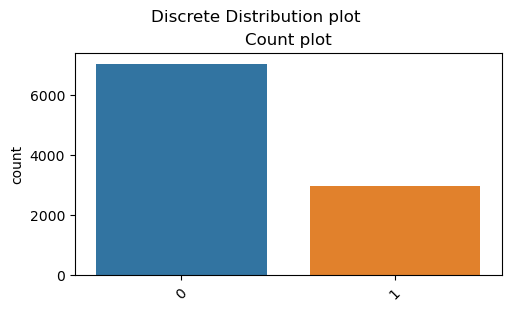

In [5]:
bernoulli_dist = bern_distribution_gen(p=0.30, size=10000)

discrete_non_viz_analysis(data=bernoulli_dist)
discrete_viz_analysis(data = bernoulli_dist)

##### Using scipy.stats to generate the bernoulli distribution

count       10000
unique     [0, 1]
nunique         2
dtype: object
Value counts: 
 0    7012
1    2988
dtype: int64 



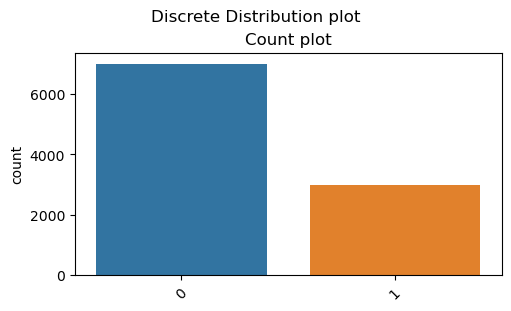

In [6]:
prob_success=0.30

var = stats.bernoulli.rvs(p=prob_success, size=10000)
discrete_non_viz_analysis(data=var)
discrete_viz_analysis(data=var)

**We can calculate the PMF for specific values.**

k= 0 specifies the value for which we want to evaluate the PMF. That is, we are looking for the probability that the Bernoulli random variable takes the value 0.

**And,** 

The function call returns the probability that a bernoulli-distributed random variable with success probability (prob_success) is equal to 0.

In [7]:
#calculating PMF
for_value_0 = stats.bernoulli.pmf(k=0, p=prob_success)
for_value_1 = stats.bernoulli.pmf(k=1, p=prob_success)

print('for_value_0 = ', for_value_0)

print('for_value_1 = ', for_value_1)

for_value_0 =  0.7
for_value_1 =  0.3


### Binomial distribution

This models the **number of successes (x) in a fixed number of independent bernoulli trials(n)**, each with the same probability of success (p).

Example:

Succes rate in a tutoring program: let's say we have 50 students(i.e n) that are enrolled, where each student has an independent probability success (of p=0.7)


**If data follows binomial distribution, we represent it like this:**

$$ \ X ∼ B (n,p) $$


**Probability mass function:**

$$ P(X=k) = \binom{n}{k} p^x (1-p)^{n-k}$$

The above can also be represented as:

$$ P(X=k) = \frac {n!}{k!(n-k)!} p^x (1-p)^{n-k}$$

OR:

$$P(X=k) = C(n,k) p^x (1-p)^{n-k}$$

**X** = the random variable representing the number of successes

**k** = number of successes in n trials

**n** = total number of trials

**p** = the probability of success on a single trial

$\binom{n}{k}$ =  binomial coefficient, also known as "n choose k", which represents the number of ways to choose k successes out of n trials.


$p^x $ = probability of getting k successes


$(1-p)^{n-k}$ = probability of getting n−k failures, where each failure has a probability 1−p.

##### Using numpy to generate the binomial distribution

In [4]:
def binomial_distribution_gen(n,p, size):
    #defining the number of trials and the prob of success
    return np.random.binomial(n=n, p=p, size=size)

count                               10000
unique     [4, 2, 3, 1, 6, 5, 0, 8, 7, 9]
nunique                                10
dtype: object
Value counts: 
 3    2672
2    2272
4    1984
1    1236
5    1050
6     387
0     288
7      85
8      23
9       3
dtype: int64 



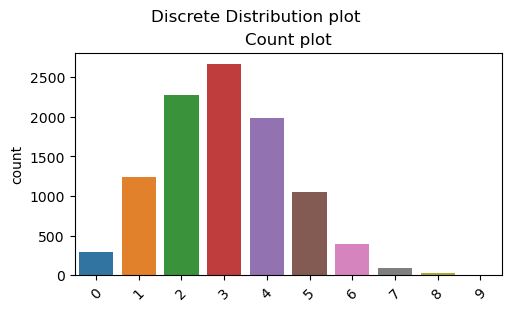

In [5]:
binomial_dist = binomial_distribution_gen(n=10, p=0.30, size=10000)

discrete_non_viz_analysis(data=binomial_dist)

discrete_viz_analysis(data=binomial_dist)

##### Using scipy.stats to generate the binomial distribution

count                               10000
unique     [3, 2, 4, 5, 1, 0, 6, 7, 8, 9]
nunique                                10
dtype: object
Value counts: 
 3    2711
2    2276
4    1990
1    1183
5    1088
6     342
0     300
7      95
8      14
9       1
dtype: int64 



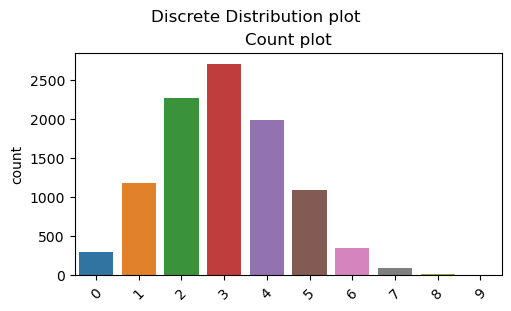

In [6]:
n_trials = 10
prob_success = 0.30
var = stats.binom.rvs(n=n_trials, p=prob_success, size=10000)

discrete_non_viz_analysis(data=var)
discrete_viz_analysis(data=var)

##### Computing the pmf and cdf

The PMF provides the probabilities for each specific value of the discrete random variable while the CDF accumulates these probabilities.

In [7]:
print('Probability of 0 success out of 10 trials:',stats.binom.pmf(k=0, n=n_trials, p=prob_success))
print('Probability of 1 success out of 10 trials:', stats.binom.pmf(k=1, n=n_trials, p=prob_success))
print('Probability of 2 successes out of 10 trials:', stats.binom.pmf(k=2, n=n_trials, p=prob_success))
print('Probability of <=2 success out of 10 trials:', stats.binom.cdf(k=2, n=n_trials, p=prob_success))
print('Probability of >=2 success out of 10 trials:', 1-stats.binom.cdf(k=1, n=n_trials, p=prob_success))

Probability of 0 success out of 10 trials: 0.02824752489999998
Probability of 1 success out of 10 trials: 0.12106082099999989
Probability of 2 successes out of 10 trials: 0.2334744405000001
Probability of <=2 success out of 10 trials: 0.38278278639999974
Probability of >=2 success out of 10 trials: 0.8506916541000001


### Poisson distribution
This models the **number of events (x) that occur in a fixed interval of time or space**, assuming events occur at a constant average rate (λ) and are independent of the time of the last event.

E.g, Customer arrivals at a bank branch every hour. Suppose on average, a bank branch receives 30 customers per hour, i.e, λ=30 (average number of customers arriving per hour). What is the probability of 40 customers (x) arriving in the next hour?

**If data follows poisson distribution, we represent it like this:**

$$ \ X ∼ P (λ) $$


**Probability mass function f(x) =**

$$ P(X=x) = \frac{\lambda^x e^{-\lambda}}{x!}$$


**Expected value (mean):**

$$ E(X) = {\lambda}$$


**Variance:**

$$ V(X) = \lambda $$


It has the following characteristics:
- It should exhibit a right-skewed, unimodal shape (unimodal shape meaning that the distribution has a single peak or mode, i.e, there is one value or a small range of values that occurs more frequently than any other).
- Variance is approximately equal to the mean


**Assumptions:**
- The rate at which events occur is constant. Though this is a discrete distribution, there is no requirement that the rate, lambda has to be an integer. The rate could be in a decimal form.
No interval can be more likely to have an event than any other interval of the same size.

- The occurrence of one event does not affect the occurrence of a subsequent (i.e events are independent)

##### Using numpy to generate the poisson distribution

In [17]:
def poisson_distribution_gen(lam, size):
    return np.random.poisson(lam=lam, size=size)

count                                                  10000
unique     [26, 46, 27, 24, 29, 38, 40, 20, 37, 31, 21, 2...
nunique                                                   41
dtype: object
Value counts: 
 29    762
30    754
31    739
28    694
32    672
27    654
26    637
33    624
34    506
25    500
35    430
24    409
36    385
23    313
37    297
22    275
38    234
21    162
39    157
40    137
20    131
41    100
19     99
42     68
18     61
43     49
17     34
44     26
45     19
46     17
16     15
15     14
14      5
47      5
48      4
50      4
13      3
49      2
52      1
11      1
55      1
dtype: int64 



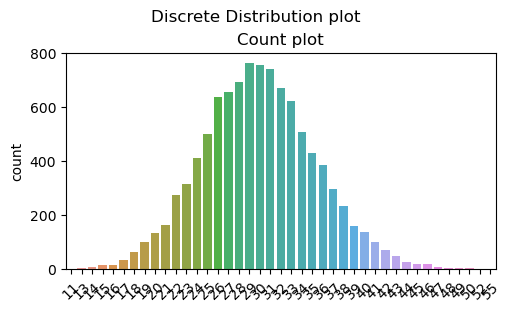

In [19]:
poisson_dist = poisson_distribution_gen(lam=30, size=10000)

discrete_non_viz_analysis(data=poisson_dist)
discrete_viz_analysis(data=poisson_dist)

In [23]:
#checking for summary statsitics

contin_non_viz_analysis(poisson_dist)

count     10000.00
min          11.00
max          55.00
mean         29.94
median       30.00
var          28.89
std           5.37
skew          0.16
kurt          0.09
dtype: float64 



##### Using scipy.stats to generate the poisson distribution

count                                                   1000
unique     [36, 20, 33, 26, 23, 38, 28, 27, 32, 31, 34, 2...
nunique                                                   33
dtype: object
Value counts: 
 29    83
28    76
30    67
31    66
33    62
32    62
35    59
27    54
34    53
26    52
36    46
25    45
24    40
23    40
22    30
37    25
38    23
39    22
20    17
21    17
41    10
40     9
43     8
42     7
44     6
19     6
17     4
45     4
18     2
16     2
47     1
52     1
12     1
dtype: int64 



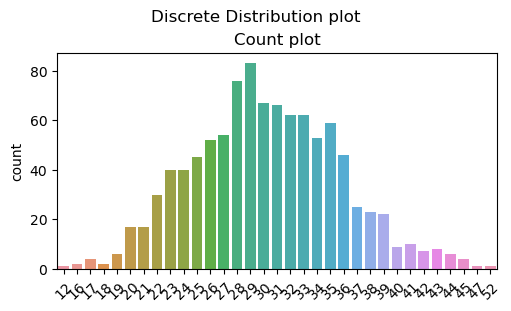

In [24]:
lambda_ = 30
var = stats.poisson.rvs(mu=lambda_, size=1000)

discrete_non_viz_analysis(data=var)
discrete_viz_analysis(data=var)

##### Computing the PMF and CDF

In [26]:
print('Prob of 20 events happening, given that on an average 30 events happen:', stats.poisson.pmf(k=20, mu=lambda_))
print('Prob of 25 events happening, given that on an average 30 events happen:', stats.poisson.pmf(k=25, mu=lambda_)) 
print('Prob of 35 events happening, given that on an average 30 events happen:', stats.poisson.pmf(k=35, mu=lambda_))
print('Prob of <=35 events happening, given that on an average 30 events happen:', stats.poisson.cdf(k=35, mu=lambda_))

Prob of 20 events happening, given that on an average 30 events happen: 0.013411150012837837
Prob of 25 events happening, given that on an average 30 events happen: 0.05111533742894147
Prob of 35 events happening, given that on an average 30 events happen: 0.045308200086552224
Prob of <=35 events happening, given that on an average 30 events happen: 0.8426165255696685


### Multinomial distribution

If you have a discrete column in your dataset with more than two distinct values (that is, cardinality > 2), the distribution of this column is known as Multinomial distribution.

Here, each observation falls into one of several categories, with each category having a specified probability. For example, if you have 5 distinct values in your column, this means 5 different categories where an observation can fall into one of them.

## CONTINUOUS distributions

### Uniform distribution

Here, **all outcomes are equally likely within a `specified range`**. For example:
- Rolling a fair six-sided die: when rolling a fair six-sided die, each face has an equal probability of 1/6. This however is an example of a uniform discrete distribution.

- Random Loan assignment: in a bank, loans are often assigned to different loan officers for processing. To ensure fairness and impartiality, the bank can use a uniform distribution to randomly assign loans to officers. This would help distribute the workload evenly among the loan officers.


**If data follows uniform distribution, we represent it like this:**

$$ \ X ∼ U (a,b) $$


**Probability density function f(x) =**

\begin{cases} 
\frac{1}{b - a} & \text{for } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}

##### What does this formula say

1. The PDF f(x) is constant for all values of x in the interval (a,b). This means that each value within this interval is equally likely

2. The height of the PDF 1/(b-a) ensures that the total area under the curve is 1. This is a requirement for all PDFs

3. For areas of x outside the interval (a,b) the PDF f(x) is 0. This refelcts the fact that values outside the interval (a,b) are impossible in this distribution

#### Using numpy to generate a uniform distribution

In [33]:
def uniform_distribution_gen(min, max, size):
    return np.random.uniform(low=min, high=max, size=size)

count     10000.00
min          10.00
max          40.00
mean         25.05
median       24.96
var          76.17
std           8.73
skew          0.01
kurt         -1.21
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


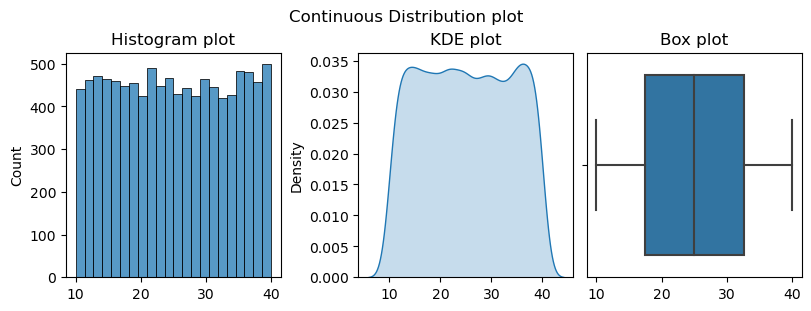

In [34]:
uniform_dist = uniform_distribution_gen(min=10, max=40, size=10000)
contin_non_viz_analysis(data=uniform_dist)
contin_viz_analysis(data=uniform_dist)

#### Using scipy.stats to generate a uniform distribution

count     10000.00
min          10.00
max          50.00
mean         30.10
median       30.16
var         133.45
std          11.55
skew         -0.01
kurt         -1.20
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


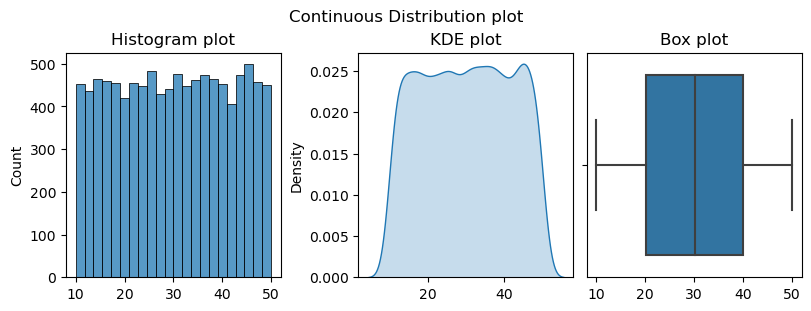

In [32]:
min=10
max=40

var=stats.uniform.rvs(loc=min, scale=max, size=10000)
contin_non_viz_analysis(data=var)
contin_viz_analysis(data=var)

#### Computing PDF and CDF

In [34]:
print('F(x=0):', stats.uniform.pdf(x=0, loc=min, scale=max))
print('F(x=20):', stats.uniform.pdf(x=20, loc=min, scale=max))
print('F(x=30):', stats.uniform.pdf(x=30, loc=min, scale=max))
print('F(x<=30):', stats.uniform.cdf(x=30, loc=min, scale=max))

F(x=0): 0.0
F(x=20): 0.025
F(x=30): 0.025
F(x<=30): 0.5


In [36]:
## Calulating the percent point function(ppf) - i.e, inverse of cdf

stats.uniform.ppf(q=0.25, loc=min, scale=max)

#this means that we are tryig to find the value that corresponds to the 25th percentile in this uniform distribution.

20.0

#### CDF vs. PPF

CDF of a random variable X at a value x is the probability that X will take a value <= x. Mathematically, it is represented as:

$$F(x) = P(X<=x)$$

Where, F(x) represents the CDF.

PPF is denoted by: $$F^{-1}(p)$$

It is the value of x such that the CDF of x = p. Mathematically:

$$F(x) = p, then, F^{-1}(p) = x$$

OR

$$F^{-1}(p) = PPF(p)$$

It is used to find thresholds or critical values in statistical analysis. The PPF is useful for finding quantiles of distribution. For example, finding the median (50th quantile) of a distribution corresponding to probability of 0.5.

### Gaussian (normal) distribution

The normal distribution is characterized by it's bell shaped curve and is widely used in various fields to **model a wide range of natural phenomena**.

The distribution can be described by its mean and std, which provides insights into the central tendency and spread of the data.

**Note:**
If a data is said to follow the normal distribution, then it follows the **68-95-99.7% rule** where:

- 68% of the total data lies within one std range from the mean
- 95% of the total data lies within 2 std
- 99.7% of the total data lies within 3 std

So, when less than 68% of your data does not lie within one standard deviation, it means that the data is not normally distributed.


E.g:

ATM transaction amounts: the amounts withdrawn by customers at the ATM of a bank can be modeled using this distribution. While some customers withdraw small amounts and some a larger amount, there will be a central tendency around an average withdrawal amount. With this information/distribution, banks can analyze the distribution of withdrawal amounts in order to manage cash reserves and plan ATM refills effectively.

**If data follows normal distribution, we represent it like this:**

$$ \ X ∼ N ({mu, sigma}) $$


**Probability density function f(x) =**

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\$$


#### Using scipy.stats  to generate a normal distribution

In [29]:
def norm_distribution_gen(mean, std, size):
    return np.random.normal(loc=mean, scale=std, size=size)

count     10000.00
min        -151.37
max         159.99
mean          9.62
median        9.57
var        1598.47
std          39.98
skew         -0.02
kurt         -0.04
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


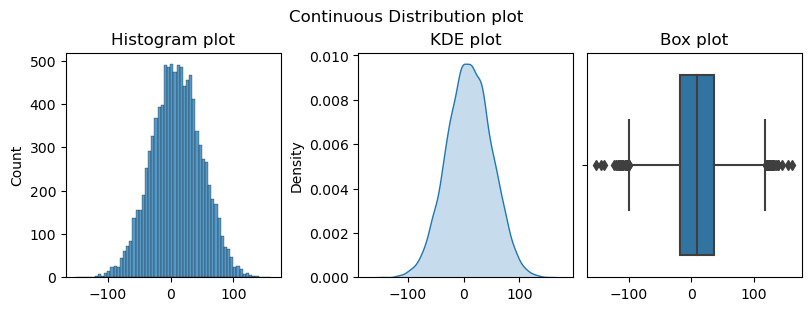

In [30]:
normal_dist = norm_distribution_gen(mean=10, std=40, size=10000)
contin_non_viz_analysis(data=normal_dist)
contin_viz_analysis(data=normal_dist)

#### Using scipy.stats to generate a normal distribution

count     10000.00
min        -161.29
max         184.12
mean         10.60
median       10.44
var        1592.51
std          39.91
skew         -0.01
kurt          0.02
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


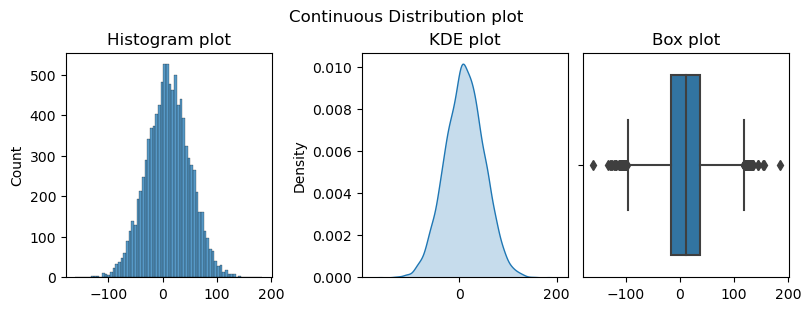

In [41]:
mean=10
std=40

var=stats.norm.rvs(loc=mean, scale=std, size=10000)

contin_non_viz_analysis(data=var)
contin_viz_analysis(data=var)

#### Computing the PDF and CDF

In [42]:
print('F(x=0):', stats.norm.pdf(x=0, loc=mean, scale=std))
print('F(x=20):', stats.norm.pdf(x=20, loc=mean, scale=std))
print('F(x=30):', stats.norm.pdf(x=30, loc=mean, scale=std))
print('F(x<=10):', stats.norm.cdf(x=10, loc=mean, scale=std))

F(x=0): 0.009666702920071232
F(x=20): 0.009666702920071232
F(x=30): 0.008801633169107488
F(x<=10): 0.5


In [44]:
#percent point function (inverse cdf)

stats.norm.ppf(q=0.5, loc=min, scale=max)

10.0

#### 68-95-99.7 rule

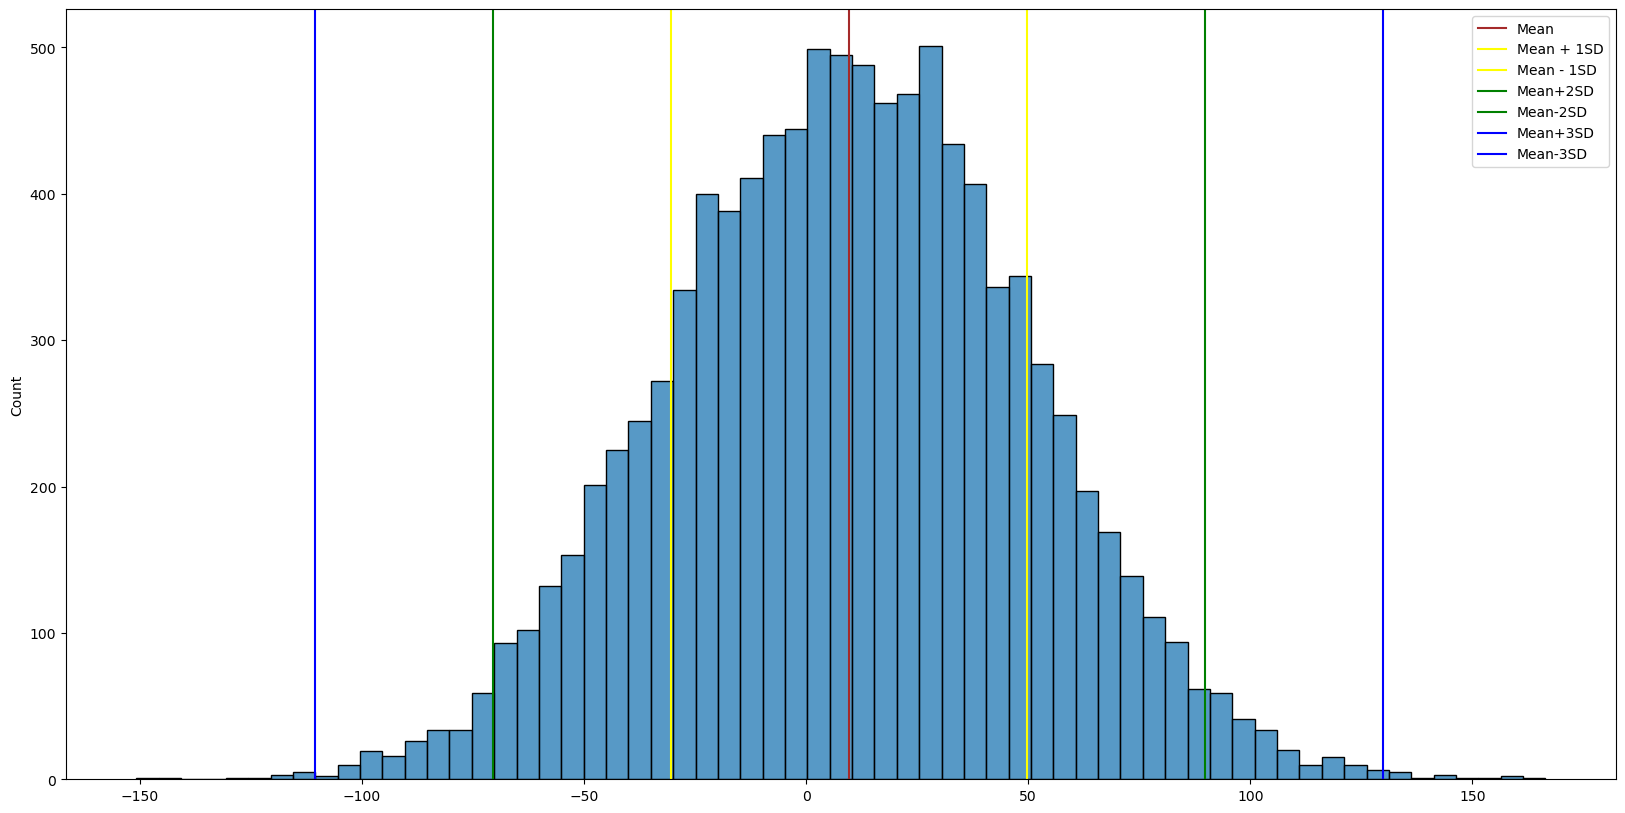

In [45]:
plt.figure(figsize=(20, 10))

sns.histplot(normal_dist)

plt.axvline(normal_dist.mean(), color='brown', label='Mean')
plt.axvline(normal_dist.mean() + (1*normal_dist.std()), color='yellow', label= 'Mean+1SD')
plt.axvline(normal_dist.mean() - (1*normal_dist.std()), color='yellow', label='Mean-1SD')
plt.axvline(normal_dist.mean() + (2*normal_dist.std()), color='green', label = 'Mean+2SD')
plt.axvline(normal_dist.mean() - (2*normal_dist.std()), color='green', label='Mean-2SD')
plt.axvline(normal_dist.mean() + (3*normal_dist.std()), color='blue', label='Mean+3SD')
plt.axvline(normal_dist.mean() - (3*normal_dist.std()), color='blue', label='Mean-3SD')

plt.legend()
plt.show()

In [46]:
#to find which values in the data 'normal_dist' fall within one standard deviation above the mean

normal_dist < (normal_dist.mean()+(1*normal_dist.std()))

array([ True,  True,  True, ...,  True,  True, False])

In [50]:
## to find the total number of values in this range

(normal_dist < (normal_dist.mean())+(1*normal_dist.std())).sum()

8436

In [51]:
#creating function to return percentage of the data

def percentage_of_data(data, x):
    left = data.mean() - (x*data.std())
    right = data.mean() + (x*data.std())
    
    total = data.shape[0]
    portion = ((data > left) & (data < right)).sum()
    
    print(f'Total:{total}')
    print(f'Num of data points between {left.round(2)} and {right.round(2)}: {portion}')
    print(f'% of data points between {left.round(2)} and {right.round(2)}: {portion/total}')

In [52]:
# for 1 std

percentage_of_data(normal_dist, 1)

Total:10000
Num of data points between -30.5 and 49.67: 6837
% of data points between -30.5 and 49.67: 0.6837


In [53]:
#for 2 std
percentage_of_data(normal_dist, 2)

Total:10000
Num of data points between -70.59 and 89.76: 9569
% of data points between -70.59 and 89.76: 0.9569


In [54]:
#for 3 std

percentage_of_data(normal_dist, 3)

Total:10000
Num of data points between -110.67 and 129.85: 9972
% of data points between -110.67 and 129.85: 0.9972


### Exponential distribution

This **models the time until an event occurs in a Poisson process**, where events occur continuously and independently at a constant average rate (λ). For e.g,

- Time between customer arrivals
- Modeling waiting times, like the time between phone calls at a call center
- **Reliability engineering**, e.g, time until failure of a component


**If data follows normal distribution, we represent it like this:**

$$ \ X ∼ E (λ) $$


**Probability density function f(x) =**

$$ 
\begin{cases} 
\lambda e^{-\lambda x} & x \geq 0 \\
0 & x < 0 
\end{cases}$$


#### Using numpy to generate an exponential distribution

In [35]:
def exponential_distribution_gen(lam, size):
    
    #scale(beta) is inverse of lambda parameter
    return np.random.exponential(scale=1/lam, size=size)

count     10000.00
min           0.00
max           1.71
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.78
kurt          4.12
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


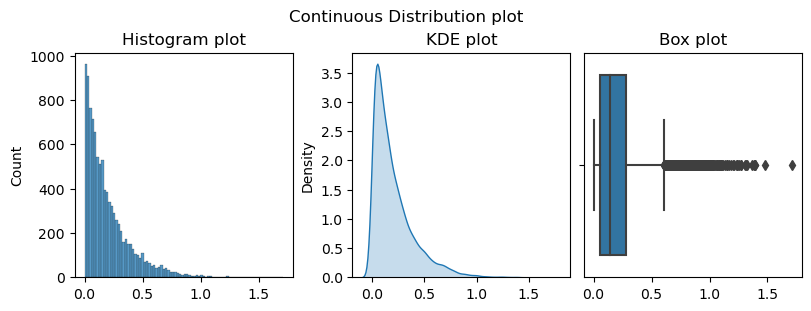

In [36]:
exponential_dist = exponential_distribution_gen(lam=5, size=10000)

contin_non_viz_analysis(data=exponential_dist)
contin_viz_analysis(data=exponential_dist)

#### Using scipy.stats to generate an exponential distribution

count     10000.00
min           0.00
max           1.81
mean          0.20
median        0.14
var           0.04
std           0.21
skew          2.04
kurt          6.19
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


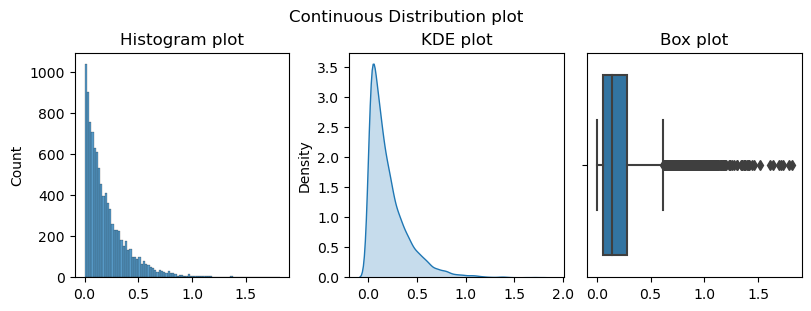

In [58]:
lambda_ = 5

var = stats.expon.rvs(scale=1/lambda_, size=10000)
contin_non_viz_analysis(data=var)
contin_viz_analysis(data=var)

#### Computing the PDF and CDF

In [59]:
print('F(x=0.5):', stats.expon.pdf(x=0.5, scale=1/lambda_))
print('F(x=0.75):', stats.expon.pdf(x=0.75, scale=1/lambda_))
print('F(x=0.90):', stats.expon.pdf(x=0.90, scale=1/lambda_))
print('F(x<=1):', stats.expon.cdf(x=1, scale=1/lambda_))

F(x=0.5): 0.410424993119494
F(x=0.75): 0.11758872928004553
F(x=0.90): 0.055544982691211525
F(x<=1): 0.9932620530009145


In [60]:
## percent point function (inverse of cdf)

stats.expon.ppf(q=0.994, scale=1/lambda_)

1.0231991619508163

### Log normal distribution

This describes a random variable whose logarithm is normally distributed. It is right skewed and therefore used for variables that are positive and have a long right tail. It can be used in:

- Modeling variables like income, asset prices and biological measurements that cannot be negative
- Finance, modeling stock prices.

#### Using numpy to generate a lognormal distribution

In [5]:
def lognormal_distribution_gen(mean, std, size):
    return np.random.lognormal(mean=mean, sigma=std, size=size)

count     10000.00
min           0.00
max        2749.84
mean          8.47
median        1.04
var        3225.31
std          56.79
skew         27.24
kurt        987.81
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


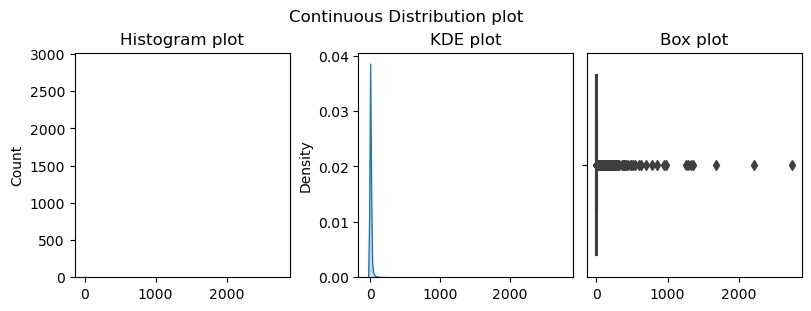

In [9]:
lognormal_dist = lognormal_distribution_gen(mean=0, std=2, size=10000)

contin_non_viz_analysis(data=lognormal_dist)
contin_viz_analysis(data=lognormal_dist)

#### Using scipy.stats to generate a lognormal distribution

count     10000.00
min           0.00
max       10426.64
mean          8.67
median        0.97
var       13071.21
std         114.33
skew         77.62
kurt       6926.09
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


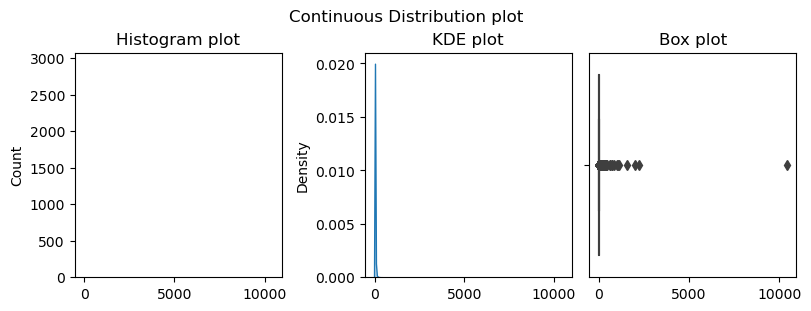

In [11]:
mean = 0
std = 2

var = stats.lognorm.rvs(s=std, scale=np.exp(mean), size=10000)

contin_non_viz_analysis(data=var)

contin_viz_analysis(data=var)

#### Computing the PDF and CDF

In [12]:
print('F(x=0.5):', stats.lognorm.pdf(x=0.5, s=std, scale=np.exp(mean)))
print('F(x=0.75):', stats.lognorm.pdf(x=0.75, s=std, scale=np.exp(mean)))
print('F(x=2):', stats.lognorm.pdf(x=2, s=std, scale=np.exp(mean)))
print('F(x<=2):', stats.lognorm.cdf(x=2, s=std, scale=np.exp(mean)))

F(x=0.5): 0.3756884160167712
F(x=0.75): 0.2632242987893306
F(x=2): 0.09392210400419279
F(x<=2): 0.6355441552634643


In [13]:
## calculating the percent point function (inverse of cdf)

stats.lognorm.ppf(q=0.636, s=std, scale=np.exp(mean))

2.004860352199883

### Pareto distribution (AKA power law distribution) - 80:20 distribution

It is a heavy-tailed distribution characterized by a long tail of rare events. **It describes phenomena where large events are rare but have a substantial impact**. It is also known as "80:20 rule". It can be used in:

- Modeling city sizes where a few cities have a very large population while most have relatively few inhabitants
- Social sciences representing the distribution of income or wealth


#### Using numpy to generate a pareto distribution

In [16]:
def pareto_distribution_gen(alpha, size):
    return np.random.pareto(a=alpha, size=size)

count     10000.00
min           0.00
max          38.36
mean          0.98
median        0.41
var           4.31
std           2.08
skew          8.22
kurt        100.25
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


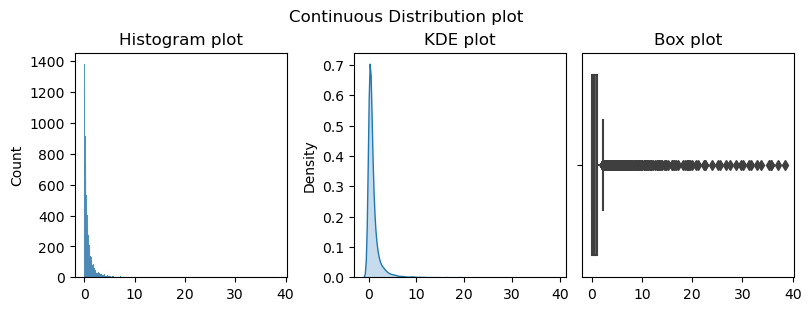

In [17]:
pareto_dist = pareto_distribution_gen(alpha=2, size=10000)

contin_non_viz_analysis(data=pareto_dist)
contin_viz_analysis(data=pareto_dist)

#### Using scipy.stats to generate a pareto distribution

count     10000.00
min           1.00
max          93.43
mean          2.01
median        1.43
var           7.17
std           2.68
skew         15.93
kurt        393.17
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


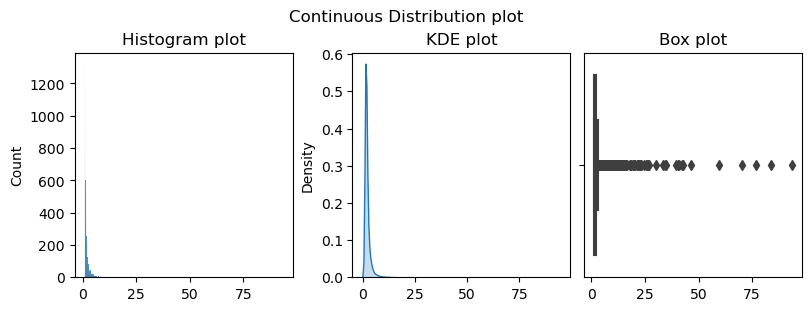

In [18]:
alpha=2

var = stats.pareto.rvs(b=alpha, size=10000)
contin_non_viz_analysis(data=var)
contin_viz_analysis(data=var)

#### Computing the PDF and CDF

In [19]:
print('F(x=0.5):', stats.pareto.pdf(x=0.5, b=alpha))
print('F(x=0.75):', stats.pareto.pdf(x=0.75, b=alpha))
print('F(x=2):', stats.pareto.pdf(x=2, b=alpha))
print('F(x<=2):', stats.pareto.cdf(x=2, b=alpha))

F(x=0.5): 0.0
F(x=0.75): 0.0
F(x=2): 0.25
F(x<=2): 0.75


## Verifing type of plot using QQ plot

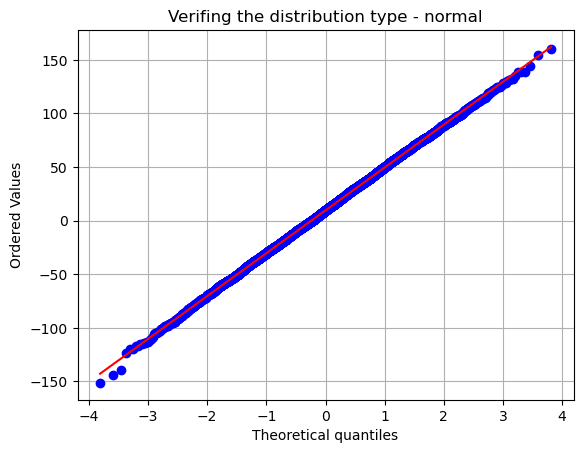

In [31]:
stats.probplot(normal_dist, dist=stats.norm, plot=plt)
plt.title('Verifing the distribution type - normal')
plt.grid(True)

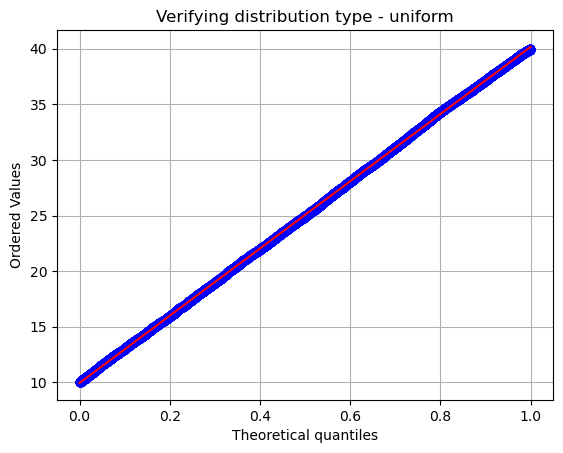

In [39]:
stats.probplot(uniform_dist, dist=stats.uniform, plot=plt)
plt.title('Verifying distribution type - uniform')
plt.grid(True)

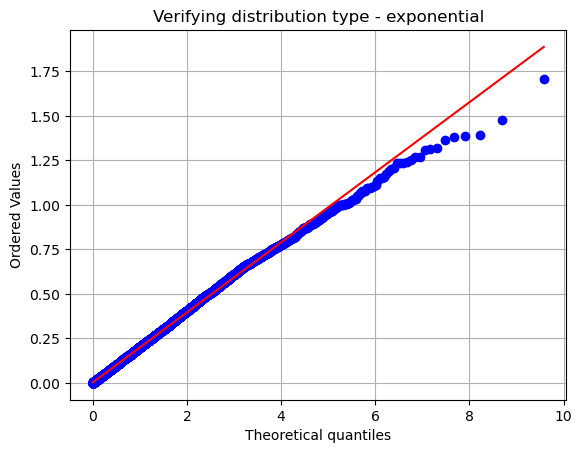

In [40]:
stats.probplot(exponential_dist, dist=stats.expon, plot=plt)

plt.title('Verifying distribution type - exponential')
plt.grid(True)

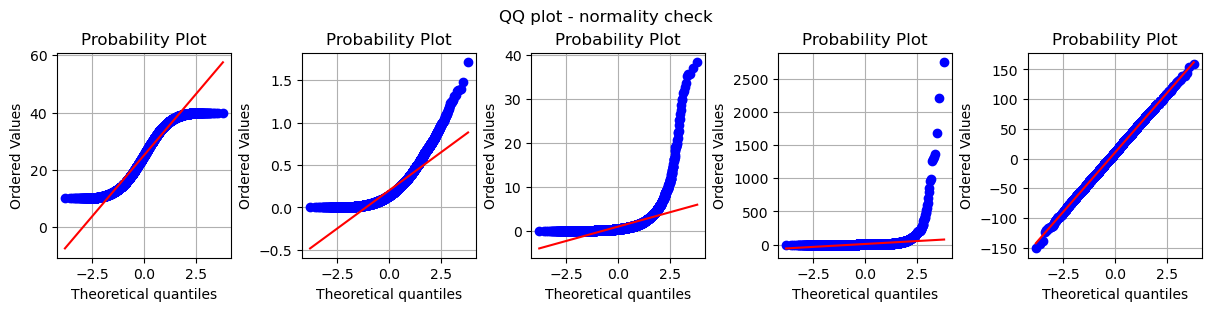

In [42]:
fig, axs = plt.subplots(1, 5, figsize=(12,3), constrained_layout=True)

fig.suptitle('QQ plot - normality check')

stats.probplot(uniform_dist, dist=stats.norm, plot=axs[0])
axs[0].grid()

stats.probplot(exponential_dist, dist=stats.norm, plot=axs[1])
axs[1].grid()

stats.probplot(pareto_dist, dist=stats.norm, plot=axs[2])
axs[2].grid()

stats.probplot(lognormal_dist, dist=stats.norm, plot=axs[3])
axs[3].grid()

stats.probplot(normal_dist, dist=stats.norm, plot=axs[4])
axs[4].grid()

## Feature engineering

### Feature scaling
This is a process of transforming data into a common format or scale. It helps to ensure that data from different sources or different units of measurement can be compared or combined more effectively. It is a crucial step in data preprocessing. There are two types of feature scaling techniques including:

1. Min-max scaling(normalization)
2. z-transformation (standardization)

count     10000.00
min        -151.37
max         159.99
mean          9.62
median        9.57
var        1598.47
std          39.98
skew         -0.02
kurt         -0.04
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


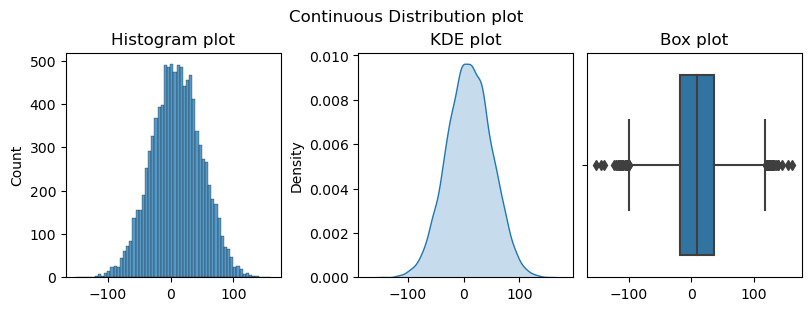

In [43]:
contin_non_viz_analysis(data=normal_dist)
contin_viz_analysis(data=normal_dist)

count     10000.00
min           0.00
max           1.71
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.78
kurt          4.12
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


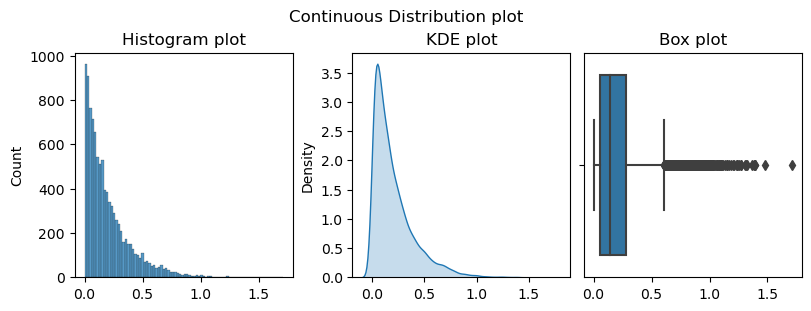

In [44]:
contin_non_viz_analysis(data=exponential_dist)
contin_viz_analysis(data=exponential_dist)

<AxesSubplot:ylabel='Count'>

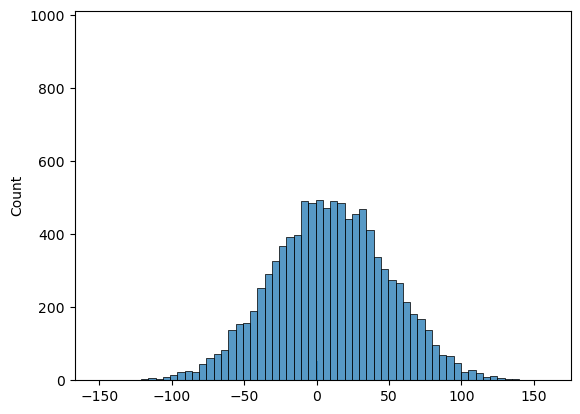

In [47]:
sns.histplot(normal_dist)
sns.histplot(exponential_dist)

### Min-Max scaling(normalization)

This is used to rescale the values of a dataset to fit within a specific range usually between 0 and 1.

$$ X^1=\frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

To apply this during data preprocessing, we import MinMaxScaler from sklearn.preprocessing


In [48]:
def min_max_scaler(data):
    min_value=np.min(data)
    max_value=np.max(data)
    return (data - min_value)/(max_value-min_value)

count     10000.00
min           0.00
max           1.00
mean          0.52
median        0.52
var           0.02
std           0.13
skew         -0.02
kurt         -0.04
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


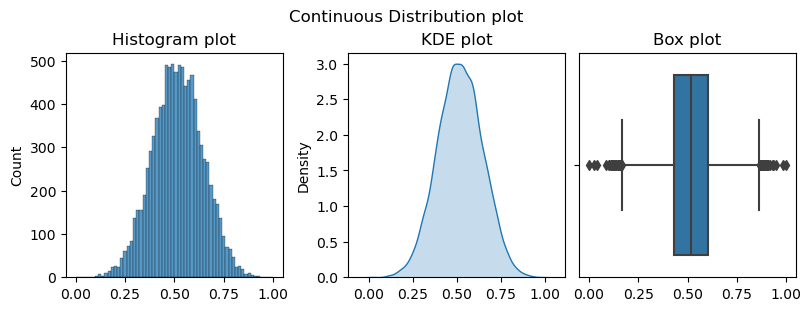

In [49]:
normal_dist_transformed = min_max_scaler(normal_dist)
contin_non_viz_analysis(data=normal_dist_transformed)
contin_viz_analysis(data=normal_dist_transformed)

count     10000.00
min           0.00
max           1.00
mean          0.12
median        0.08
var           0.01
std           0.12
skew          1.78
kurt          4.12
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


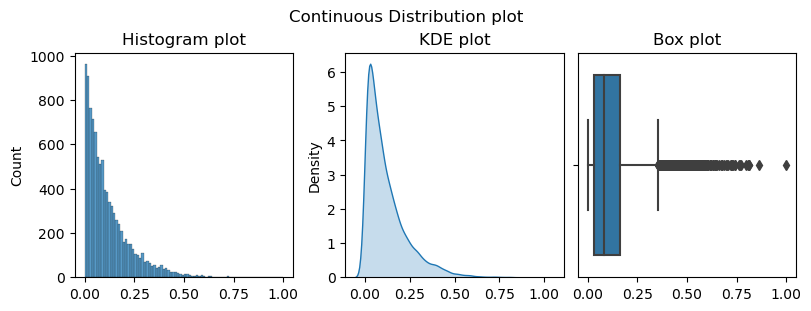

In [50]:
exponential_dist_transformed = min_max_scaler(exponential_dist)
contin_non_viz_analysis(exponential_dist_transformed)
contin_viz_analysis(exponential_dist_transformed)

<AxesSubplot:ylabel='Count'>

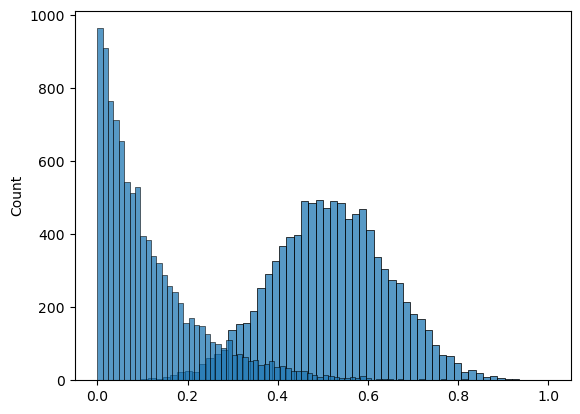

In [51]:
sns.histplot(normal_dist_transformed)
sns.histplot(exponential_dist_transformed)

### z-transformation (standardization)

Transforms data into a standard normal distribution with a mean of 0 and std of 1.

In [52]:
def z_transformer(data):
    mean=np.mean(data)
    std=np.std(data)
    return (data-mean)/std

count     10000.00
min          -4.03
max           3.76
mean         -0.00
median       -0.00
var           1.00
std           1.00
skew         -0.02
kurt         -0.04
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


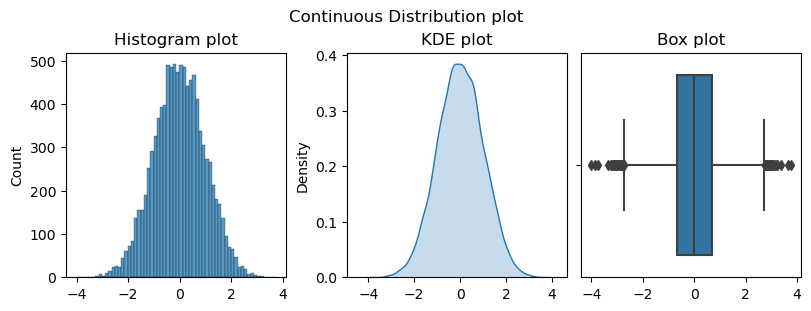

In [53]:
normal_dist_transformed = z_transformer(normal_dist)
contin_non_viz_analysis(normal_dist_transformed)
contin_viz_analysis(normal_dist_transformed)

count     10000.00
min          -1.02
max           7.68
mean         -0.00
median       -0.30
var           1.00
std           1.00
skew          1.78
kurt          4.12
dtype: float64 



C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


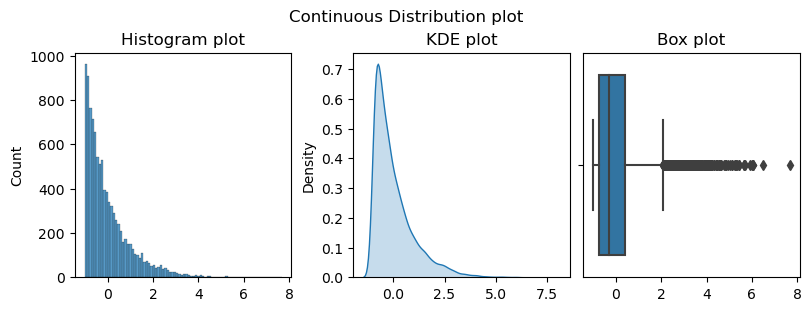

In [54]:
exponential_dist_transformed=z_transformer(exponential_dist)
contin_non_viz_analysis(exponential_dist_transformed)
contin_viz_analysis(exponential_dist_transformed)

<AxesSubplot:ylabel='Count'>

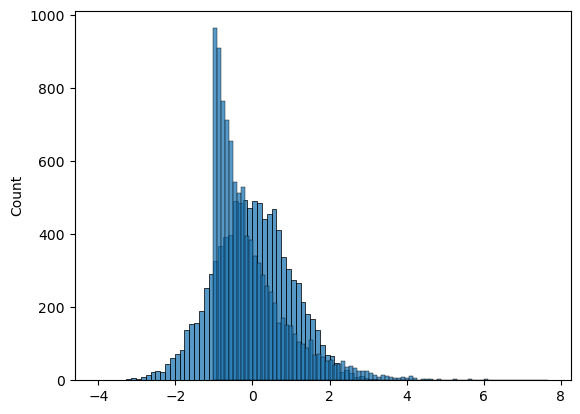

In [55]:
sns.histplot(normal_dist_transformed)
sns.histplot(exponential_dist_transformed)

## Data transformation

- Log transformation
- Box-Cox

### Log transformation

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


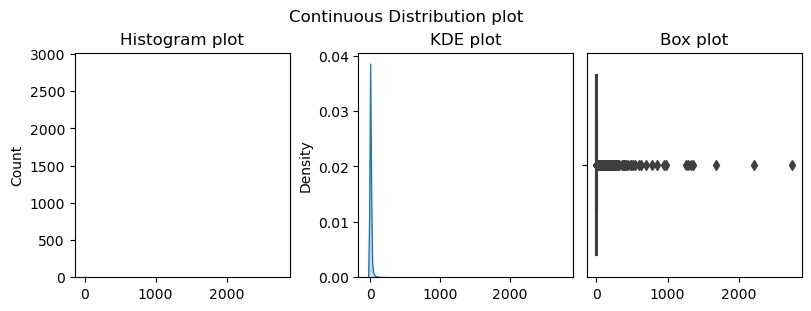

In [56]:
contin_viz_analysis(data=lognormal_dist)

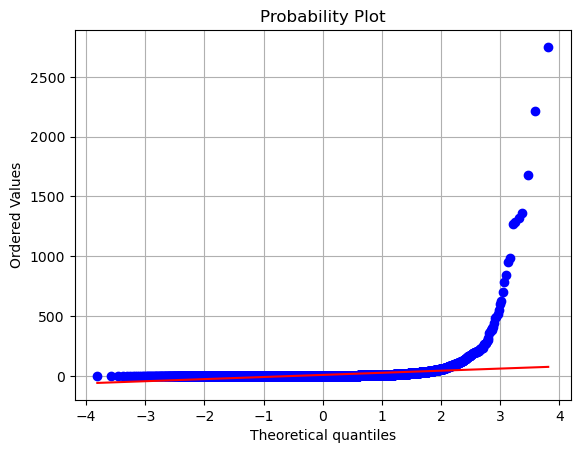

In [57]:
stats.probplot(lognormal_dist, dist=stats.norm, plot=plt)
plt.grid(True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


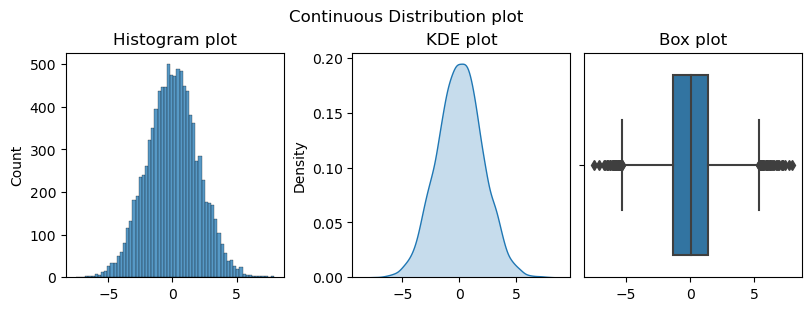

In [58]:
lognormal_dist_transformed = np.log(lognormal_dist)
contin_viz_analysis(data=lognormal_dist_transformed)

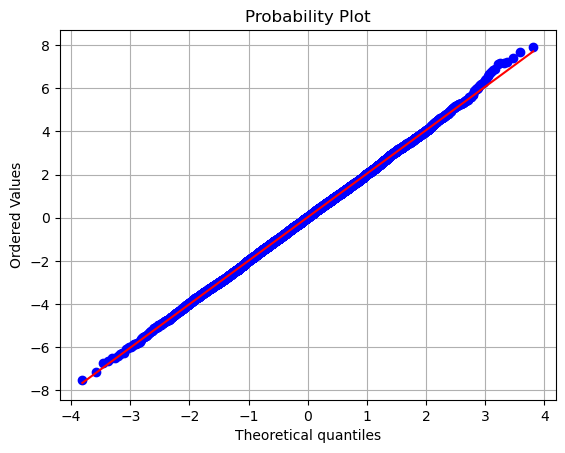

In [59]:
#checking again

stats.probplot(lognormal_dist_transformed, dist=stats.norm, plot=plt)
plt.grid()

### Box Cox transformation

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


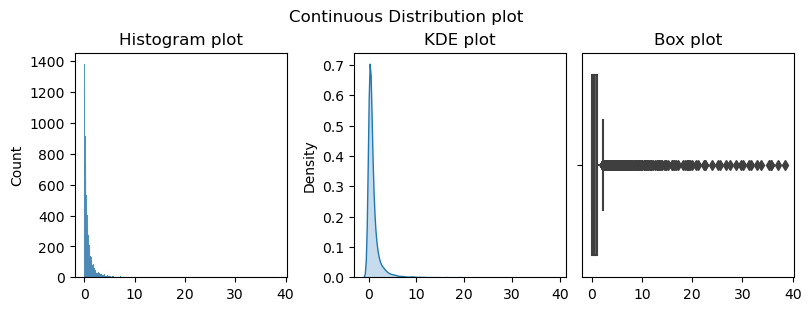

In [60]:
contin_viz_analysis(data=pareto_dist)

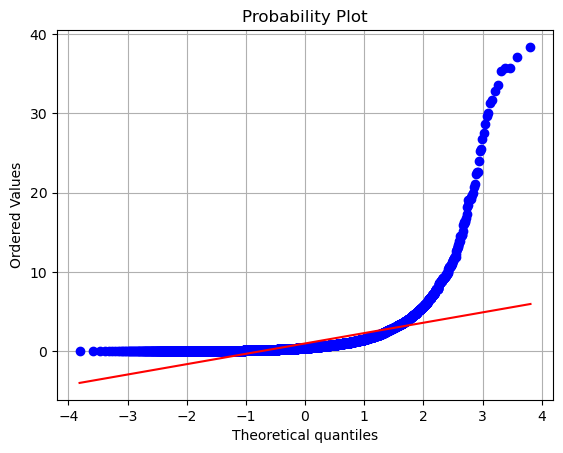

In [61]:
#normality test

stats.probplot(pareto_dist, dist=stats.norm, plot=plt)
plt.grid(True)

In [63]:
## pareto_dist_transformed = transformed by box-cox, l=lambda

pareto_dist_transformed, lam = stats.boxcox(pareto_dist)

print(lam)

0.0993369591419895


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


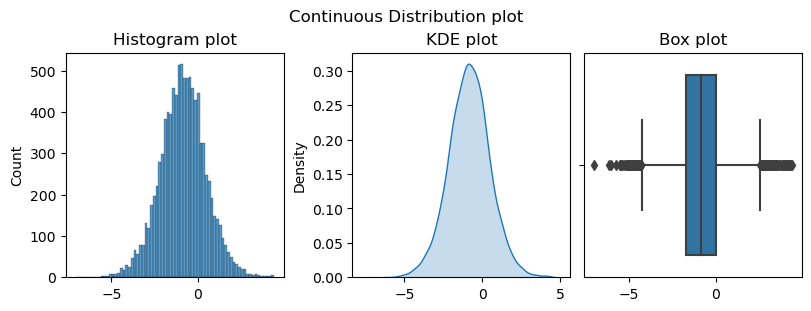

In [64]:
contin_viz_analysis(data=pareto_dist_transformed)

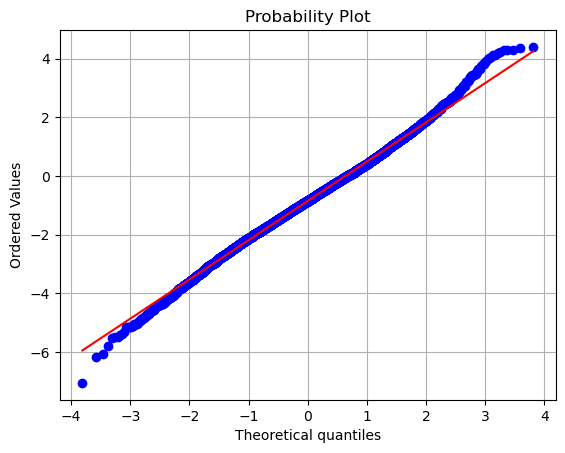

In [65]:
#testing for normality again

stats.probplot(pareto_dist_transformed, dist=stats.norm, plot=plt)
plt.grid(True)

## Case study

### Scenario: setting up a garment store
A friend has decided to set up a garment store. Launching a new business with limited funds demands meticulous planning, resourcefulness and a good understanding of the market. At this initial phase, my friend has decided to focus solely on only one product - Jeans, and is investing 100,000 naira in inventory.

**Question:** how should the available budget be allocated for the inventory?

**Answer:**

To determine the optimal budget allocation can be a bit challenging especially without a thorough market analysis. A preliminary suggestion might be to allocate 50,000 naira for both male and female customers.

However, what if there's a scarcity of male customers?

As a data scientist, I have to provide a solution.

**Solution:**

Budget allocation can rely on many factors like:

`1. Gender split:`

Since my friend is offering jeans, it is essential to consider the gender split among potential customers. This will help to determine how to allocate the budget effectively.

`2. Sizing considerations:`

Different body sizes and types need to be taken into account. It will be beneficial to allocate a portion of the budget for various sizes.

I have also been able to collect some data.

In [1]:
##importing the libraries and load the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Data/height_gender_data.csv')
df.head()

,Unnamed: 0,height,gender
0,0,142.905550,Male
1,1,115.598717,Male
2,2,138.027187,Female
3,3,130.939245,Male
4,4,125.079458,Female


In [4]:
#removing unwanted column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,height,gender
0,142.905550,Male
1,115.598717,Male
2,138.027187,Female
3,130.939245,Male
4,125.079458,Female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  10000 non-null  float64
 1   gender  10000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


**Domain knowledge**

With the help of an expert, I got the following information about jean sizes and height ranges for both the genders. I'll be considering the following table/chart for better budget allocation.

| Group          | Small            | Medium              | Large            |
|----------------|------------------|---------------------|------------------|
| Female Heights | [120, 136.61]    | [136.62 to 153.41]  | [154.42 to 170]  |
| Male Heights   | [99.87, 129.97]  | [129.98, 160.07]    | [160.08, 190.17] |



In [6]:
df['height'] = round(df['height'], 2)
df.head()

,height,gender
0,142.91,Male
1,115.60,Male
2,138.03,Female
3,130.94,Male
4,125.08,Female


In [7]:
## adding a new column to the dataframe containing the sizez for each gender

female_sizes = {
    'small': (120, 136.61),
    'medium': (135.62, 153.41),
    'large': (154.42, 170)
}

male_sizes = {
    'small': (99.87, 129.97),
    'medium': (129.98, 160.07),
    'large': (160.08, 190.17)
}

## categorizing sizes based on height and gender'

def categorize_size(row):
    if row['gender'] == 'Female':
        sizes = female_sizes
    else:
        sizes = male_sizes
        
    
    for size, (min_height, max_height) in sizes.items():
        if min_height <= row['height'] <= max_height:
            return size
        
    return None

df['size'] = df.apply(categorize_size, axis=1)
df.head(10)

,height,gender,size
0,142.91,Male,medium
1,115.60,Male,small
2,138.03,Female,medium
3,130.94,Male,medium
4,125.08,Female,small
5,145.80,Male,medium
6,149.13,Male,medium
7,161.79,Male,large
8,165.20,Male,large
9,166.59,Female,large


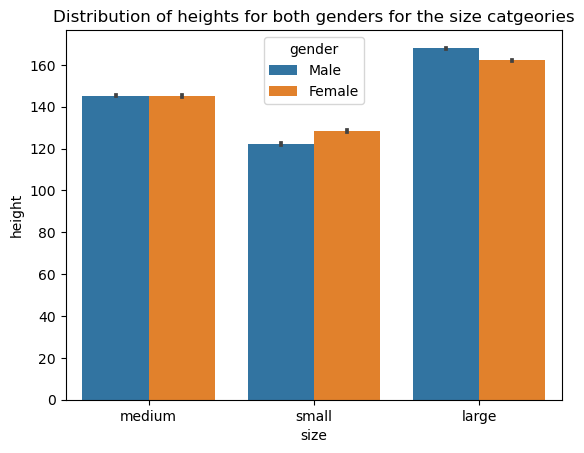

In [19]:
sns.barplot(data=df, x='size', y='height', hue='gender')
plt.title('Distribution of heights for both genders for the size catgeories')
plt.show()

In [12]:
proportions = df.groupby(['gender', 'size']).size()/len(df)
proportions = proportions.reset_index(name='proportion')
proportions['% proportion'] = round(proportions['proportion']*100, 2)
proportions

,gender,size,proportion,% proportion
0,Female,large,0.0911,9.11
1,Female,medium,0.0975,9.75
2,Female,small,0.0952,9.52
3,Male,large,0.1116,11.16
4,Male,medium,0.4847,48.47
5,Male,small,0.1135,11.35


In [18]:
total_budget = 100000

cost_per_unit = 2000
#assuming constant cost for each unit

#total number of units that can be purchased
total_units = total_budget//cost_per_unit

#allocating the budget
proportions['allocated_units'] = (proportions['proportion']*total_units).round().astype(int)
proportions['allocated_amt (#)'] = (proportions['allocated_units']*cost_per_unit).astype(int)
proportions

,gender,size,proportion,% proportion,allocated_units,allocated_amt (#)
0,Female,large,0.0911,9.11,5,10000
1,Female,medium,0.0975,9.75,5,10000
2,Female,small,0.0952,9.52,5,10000
3,Male,large,0.1116,11.16,6,12000
4,Male,medium,0.4847,48.47,24,48000
5,Male,small,0.1135,11.35,6,12000


Based on the data provided, assuming everything else to be constant, the table above shows the number of units and consequently the amount (from the budget) she can allocate for each gender and size. My friend in this case would spend close to 50% of the budget on the male category having medium sizes.